In [1]:
import numpy as np
from matplotlib import pyplot as plt
import timeit
import decimal
decimal.getcontext().prec = 100
from scipy.optimize import curve_fit
import warnings
warnings.simplefilter('ignore')
from time import time

## I. Generate an n-dimensional random vector 𝒗 = [𝑣%, 𝑣', ... , 𝑣)] with non-negative elements. For 𝒗, implement calculations and algorithms. 

In [2]:
#constant function
def const_func(array):
    return 1

#the sum of elements
def sum_func(array):
    amount = 0
    for i in array:
        amount += i
    return amount

#the product of elements
def product_func(array):
    product = 1
    for i in array:
        product *= i
    return product

#polynomial by direct calculation
def polynom_func(array, num):
    polynom = decimal.Decimal(0)
    for i in range(num):
        polynom += decimal.Decimal(array[i].item()) * (decimal.Decimal(1.5) ** i)
    return polynom

#polynomial by Horner's method
def horner_func(array, num):
    polynomial = array[0]
    for i in range(1, num):
        polynomial = polynomial * 1.5 + array[i]
    return polynomial

#Bubble Sort of the elements
def bubblesort_func(array):
    for i in range(len(array)-1):
        for j in range(len(array)-1):
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]
    return array

#Quick Sort of the elements
def quicksort_func(array):
    return np.sort(array, kind='quicksort')

#Timsort of the elements
def timsort_func(array):
    return np.sort(array, kind='stable')

In [3]:
# functions for approximation theoretical time complixities of the aglorhythms

def const_theor(x, a):
    return a

def lin_theor(x, a, b):
    return a * x + b

def loglin_theor(x, a):
    return a * x * np.log(x)

def square_theor(x, a, b, c):
    return a * x ** 2 + b * x + c

def cubic_theor(x, a, b, c, d):
    return a * x ** 3 + b * x ** 2 + c * x + d

### Visualization of results

#### Constant function

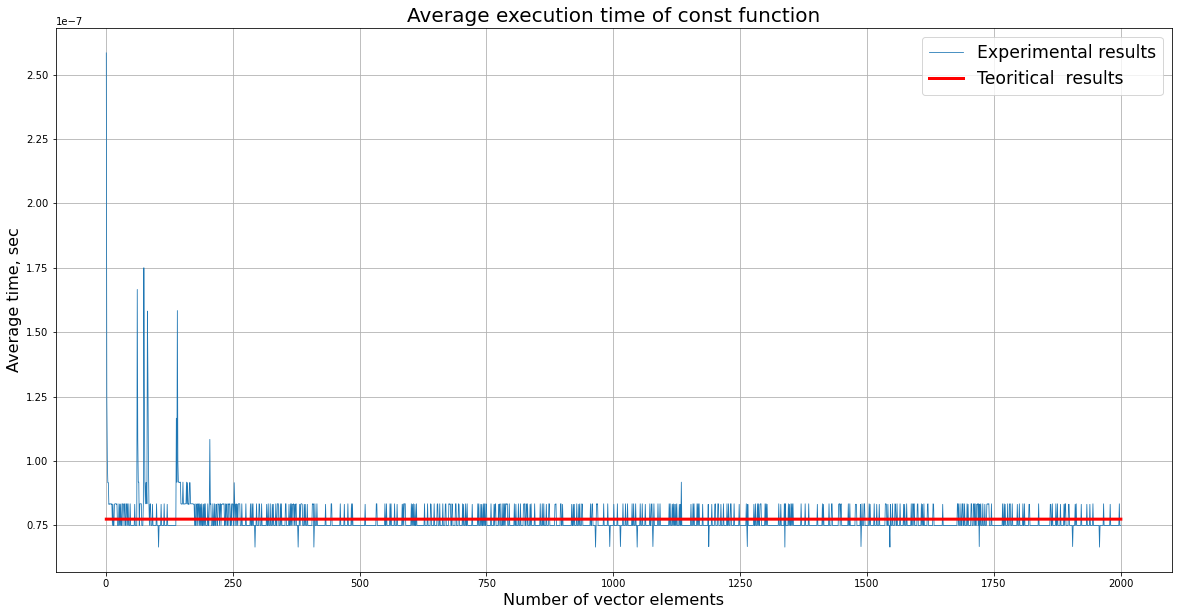

In [4]:
array = []
num = list(range(1, 2001))
time =[]

for i in range(1, 2001):
    array = np.random.randint(0, 10000, size=i)
    execution_time = timeit.timeit('const_func(array)', 
                                 setup='from __main__ import  const_func, array', number=5)/5
    time.append(execution_time)
    
popt, pcov = curve_fit(const_theor, num, time)
time_theor = []
for n in num:
    time_theor.append(const_theor(n, *popt))
     
plt.figure(figsize=(20, 10))

plt.plot(num, time, label="Experimental results", linewidth=0.8)
plt.plot(num, time_theor, label="Teoritical  results", linewidth=3, color='red')
plt.legend(fontsize='xx-large')
plt.title('Average execution time of const function', fontsize=20)
plt.xlabel('Number of vector elements', fontsize=16)
plt.ylabel('Average time, sec', fontsize=16)
plt.grid()
plt.savefig('const_func.png', dpi=300)

#### Sum of elements

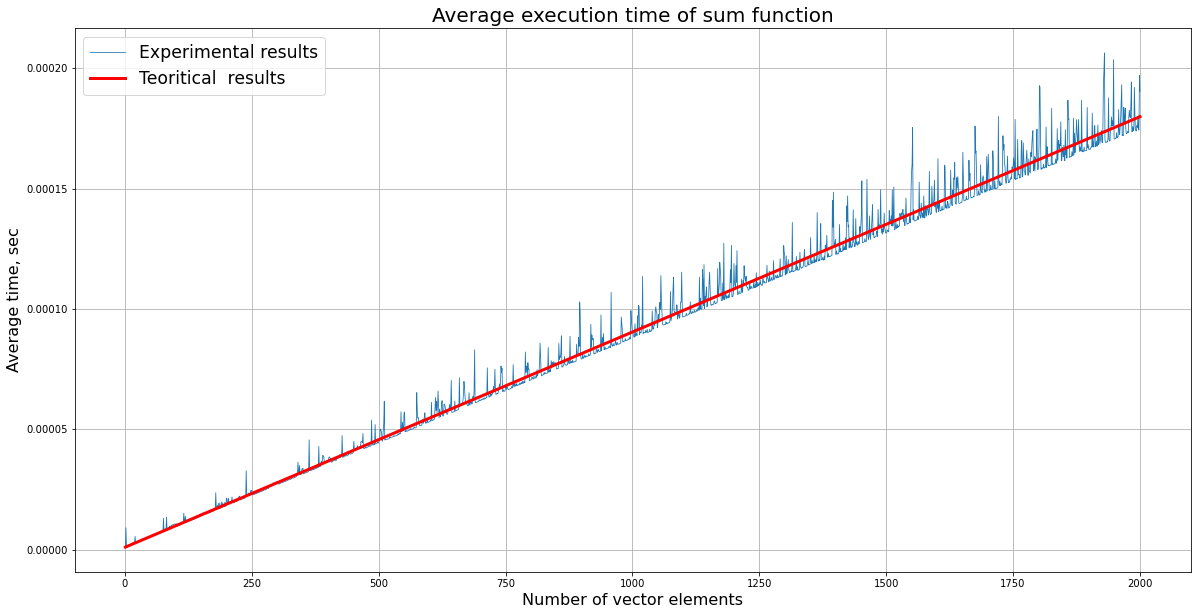

In [5]:
array = []
num = list(range(1, 2001))
time =[]

for i in range(1, 2001):
    array = np.random.randint(0, 10000, size=i)    
    execution_time = timeit.timeit('sum_func(array)',
                                 setup='from __main__ import  sum_func, array', number=5)/5
    time.append(execution_time)

popt, pcov = curve_fit(lin_theor, num, time)
time_theor = []
for n in num:
    time_theor.append(lin_theor(n, *popt))
     
plt.figure(figsize=(20, 10))
    
plt.plot(num, time, label="Experimental results", linewidth=0.8)
plt.plot(num, time_theor, label="Teoritical  results", linewidth=3, color='red')
plt.legend(fontsize='xx-large')
plt.title('Average execution time of sum function', fontsize=20)
plt.xlabel('Number of vector elements', fontsize=16)
plt.ylabel('Average time, sec', fontsize=16)
plt.grid()
plt.savefig('sum_func.png', dpi=300)

#### Product of elements

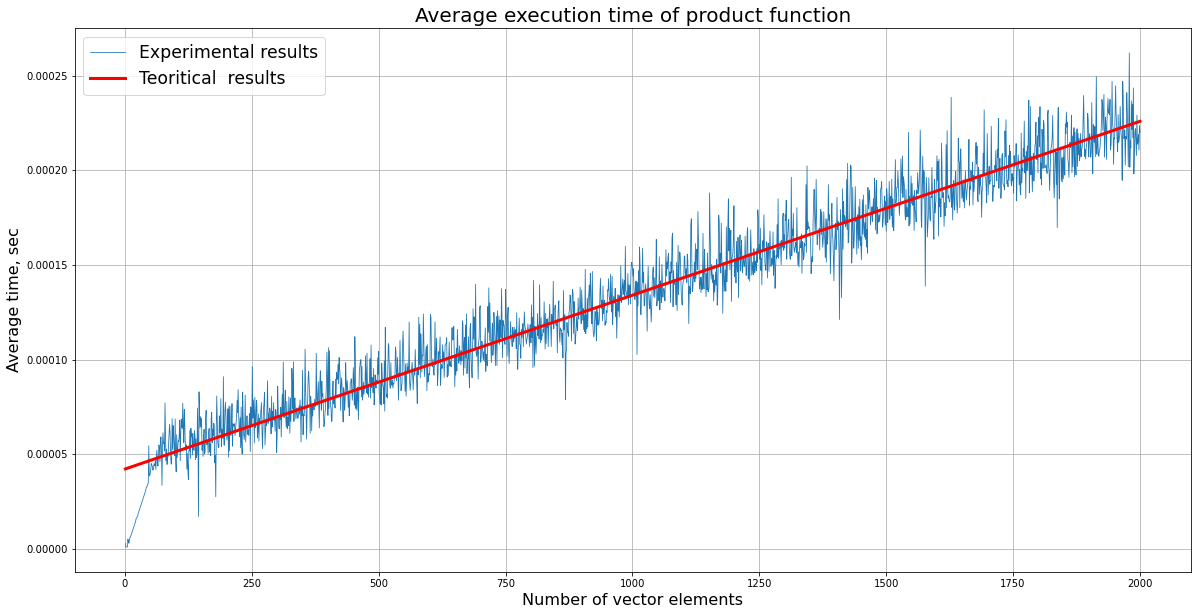

In [6]:
array = []
num = list(range(1, 2001))
time =[]

for i in range(1, 2001):
    array = np.random.randint(0, 10000, size=i)       
    execution_time = timeit.timeit('product_func(array)', 
                                 setup='from __main__ import  product_func, array', number=5)/5
    time.append(execution_time)
   
    
popt, pcov = curve_fit(lin_theor, num, time)
time_theor = []
for n in num:
    time_theor.append(lin_theor(n, *popt))

plt.figure(figsize=(20, 10))
    
plt.plot(num, time, label="Experimental results", linewidth=0.8)
plt.plot(num, time_theor, label="Teoritical  results", linewidth=3, color='red')
plt.legend(fontsize='xx-large')
plt.title('Average execution time of product function', fontsize=20)
plt.xlabel('Number of vector elements', fontsize=16)
plt.ylabel('Average time, sec', fontsize=16)
plt.grid()
plt.savefig('product_func.png', dpi=300)

#### Polynomial by a direct calculation

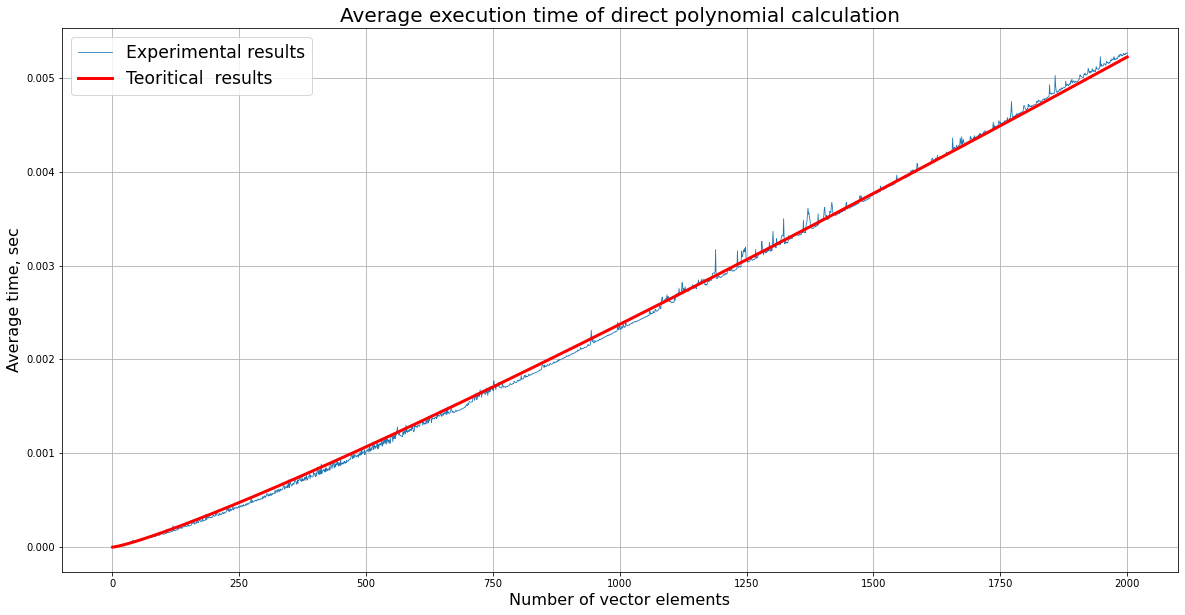

In [7]:
array = []
num = list(range(1, 2001))
time =[]

for i in range(1, 2001):
    array = np.random.randint(0, 10000, size=i) 
    execution_time = timeit.timeit('polynom_func(array, i)',
                                 setup='from __main__ import  polynom_func, array, i',number=5)/5
    time.append(execution_time)

popt, pcov = curve_fit(loglin_theor, num, time)
time_theor = []
for n in num:
    time_theor.append(loglin_theor(n, *popt))

plt.figure(figsize=(20, 10))

plt.plot(num, time, label="Experimental results", linewidth=0.8)
plt.plot(num, time_theor, label="Teoritical  results", linewidth=3, color='red')
plt.legend(fontsize='xx-large')
plt.title('Average execution time of direct polynomial calculation', fontsize=20)
plt.xlabel('Number of vector elements', fontsize=16)
plt.ylabel('Average time, sec', fontsize=16)
plt.grid()
plt.savefig('polynom_func.png', dpi=300)

#### Polynomial by Horner's method

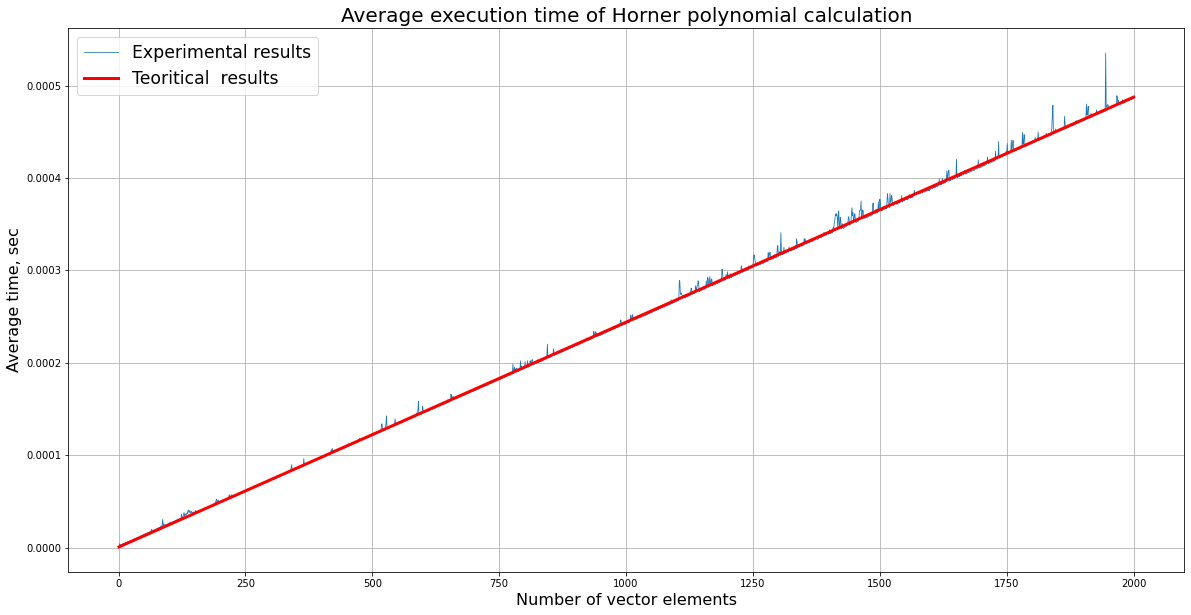

In [8]:
array = []
num = list(range(1, 2001))
time =[]

time_n=[]

for i in range(1, 2001):
    array = np.random.randint(0, 10000, size=i)  
    execution_time = timeit.timeit('horner_func(array, i)',
                                 setup='from __main__ import  horner_func , array, i', number=5)/5

    time.append(execution_time)   
    
popt, pcov = curve_fit(lin_theor, num, time)
time_theor = []
for n in num:
    time_theor.append(lin_theor(n, *popt))

plt.figure(figsize=(20, 10))

plt.plot(num, time, label="Experimental results", linewidth=0.8)
plt.plot(num, time_theor, label="Teoritical  results", linewidth=3, color='red')
plt.legend(fontsize='xx-large')
plt.title('Average execution time of Horner polynomial calculation', fontsize=20)
plt.xlabel('Number of vector elements', fontsize=16)
plt.ylabel('Average time, sec', fontsize=16)
plt.grid()
plt.savefig('horner_func.png', dpi=300)

#### Bubble Sort

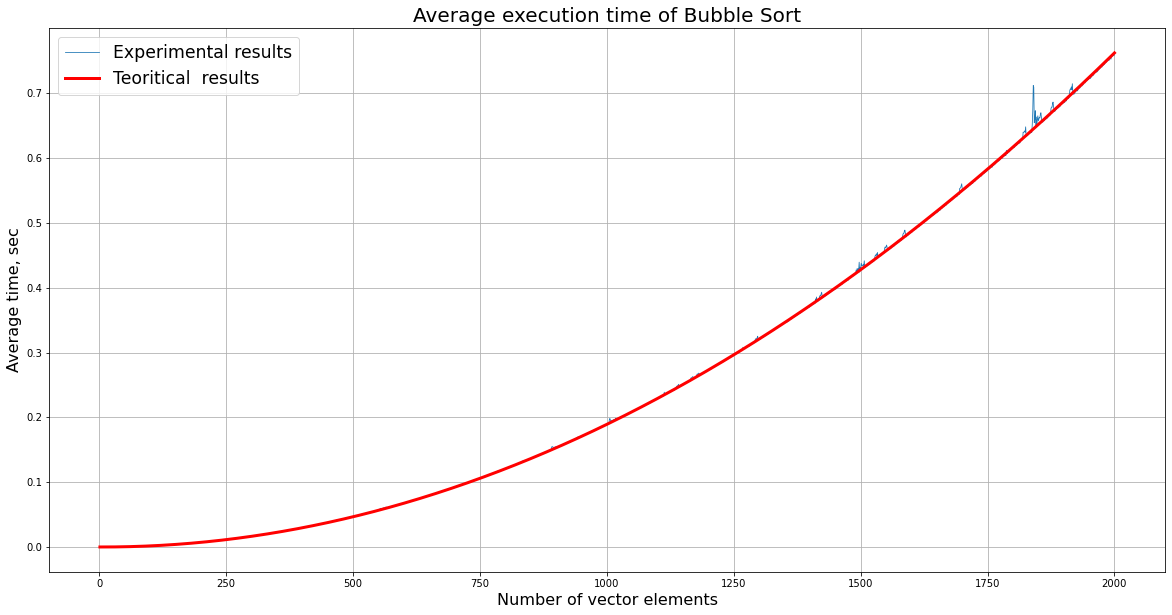

In [9]:
array = []
num = list(range(1, 2001))
time =[]

for i in range(1, 2001):
    array = np.random.randint(0, 10000, size=i)  
    execution_time = timeit.timeit('bubblesort_func(array)',
                                 setup='from __main__ import  bubblesort_func, array', number=5)/5
    time.append(execution_time)

popt, pcov = curve_fit(square_theor, num, time)
time_theor = []
for n in num:
    time_theor.append(square_theor(n, *popt))

plt.figure(figsize=(20, 10))

plt.plot(num, time, label="Experimental results", linewidth=0.8)
plt.plot(num, time_theor, label="Teoritical  results", linewidth=3, color='red')
plt.legend(fontsize='xx-large')
plt.title('Average execution time of Bubble Sort', fontsize=20)
plt.xlabel('Number of vector elements', fontsize=16)
plt.ylabel('Average time, sec', fontsize=16)
plt.grid()
plt.savefig('bubblesort_func.png', dpi=300)

#### Quick Sort 

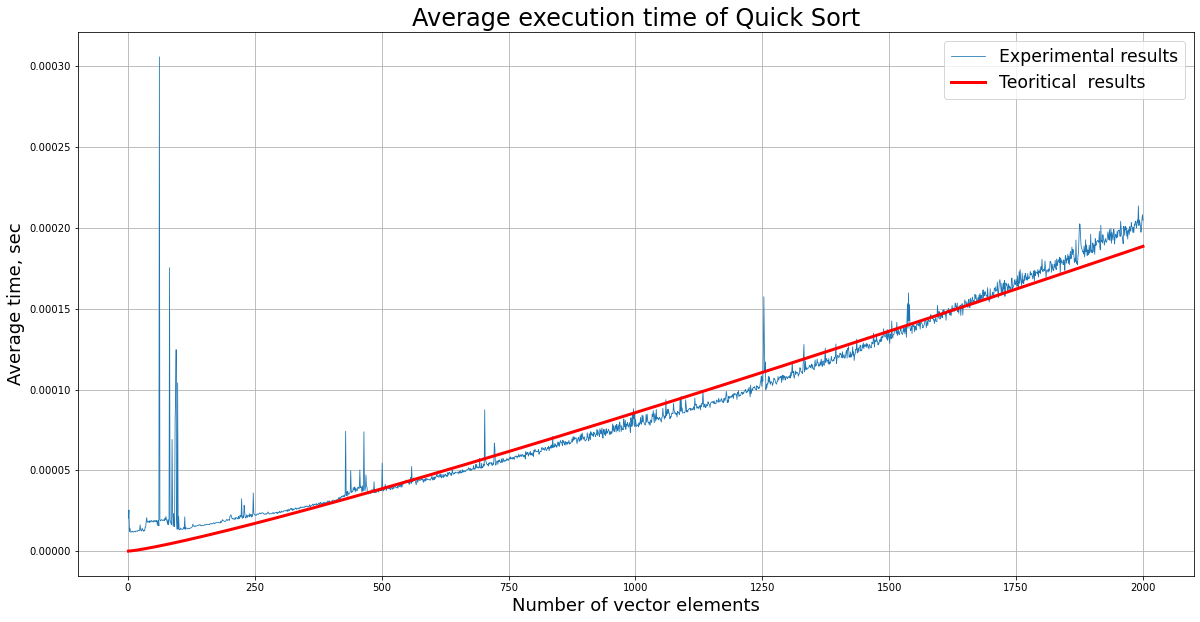

In [10]:
array = []
num = list(range(1, 2001))
time =[]

for i in range(1, 2001):
    array = np.random.randint(0, 10000, size=i) 
    execution_time = timeit.timeit('quicksort_func(array)',
                                 setup='from __main__ import  quicksort_func, array', number=5)
    time.append(execution_time)
    
popt, pcov = curve_fit(loglin_theor, num, time)
time_theor = []
for n in num:
    time_theor.append(loglin_theor(n, *popt))

plt.figure(figsize=(20, 10))

plt.plot(num, time, label="Experimental results", linewidth=0.8)
plt.plot(num, time_theor, label="Teoritical  results", linewidth=3, color='red')
plt.legend(fontsize='xx-large')
plt.title('Average execution time of Quick Sort', fontsize=24)
plt.xlabel('Number of vector elements', fontsize=18)
plt.ylabel('Average time, sec', fontsize=18)
plt.grid()
plt.savefig('quicksort_func.png', dpi=300, bbox_inches='tight')

#### Timsort

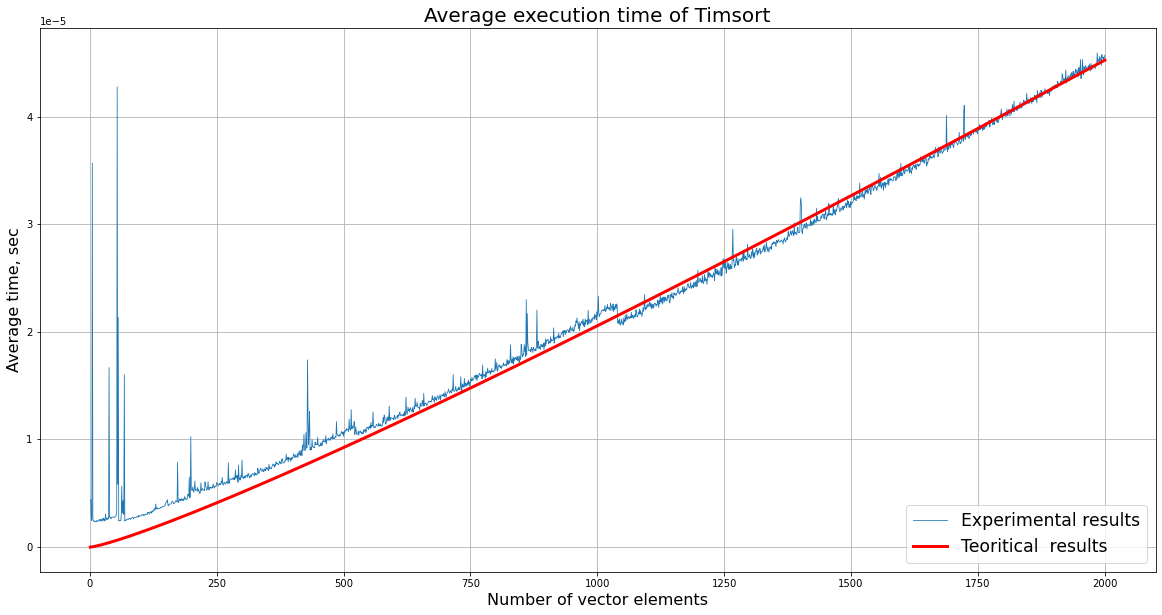

In [11]:
array = []
num = list(range(1, 2001))
time =[]

for i in range(1, 2001):
    array = np.random.randint(0, 10000, size=i) 
    execution_time = timeit.timeit('timsort_func(array)',
                                 setup='from __main__ import  timsort_func, array', number=5)/5
    time.append(execution_time)
    
popt, pcov = curve_fit(loglin_theor, num, time)
time_theor = []
for n in num:
    time_theor.append(loglin_theor(n, *popt))

plt.figure(figsize=(20, 10))

plt.plot(num, time, label="Experimental results", linewidth=0.8)
plt.plot(num, time_theor, label="Teoritical  results", linewidth=3, color='red')
plt.legend(fontsize='xx-large')
plt.title('Average execution time of Timsort', fontsize=20)
plt.xlabel('Number of vector elements', fontsize=16)
plt.ylabel('Average time, sec', fontsize=16)
plt.grid()
plt.savefig('timsort_func.png', dpi=300)

## Generate random matrices 𝐴 and 𝐵 of size 𝑛 × 𝑛 with non-negative elements. Find the usual matrix product for 𝐴 and 𝐵.

In [12]:
#the usual matrix product
def matrix_product(matrix_A, matrix_B, n):
    prod = np.zeros((n, n))
    for i in range(len(matrix_A)):
        for j in range(len(matrix_B[0])):
            for k in range(len(matrix_B)):
                prod[i][j] += matrix_A[i][k] * matrix_B[k][j]
    return prod

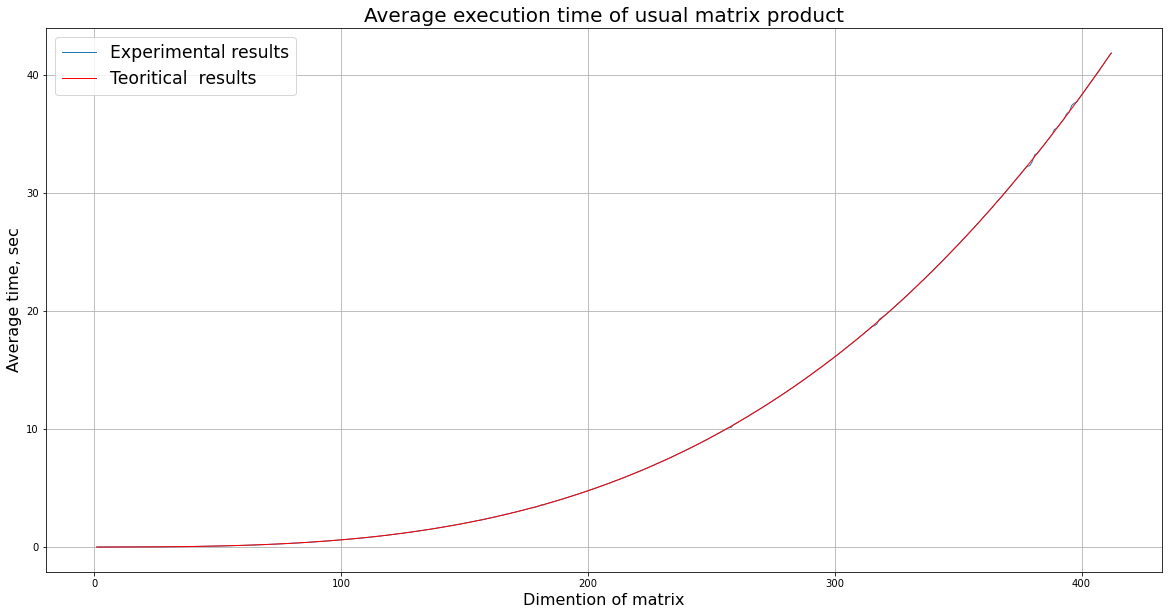

In [14]:
array = []
time_list =[]
time_to_work = 21600 #6 hours
numbers = []
start = time()
number = 0
dimension = 0

while time() - start < time_to_work:
    number += 1
    dimension += 1
    numbers.append(number)
    A = np.random.random((dimension, dimension))
    B = np.random.random((dimension, dimension))

    execution_time = timeit.timeit('matrix_product(A, B, i)',
                                     setup='from __main__ import  matrix_product, A, B, i', number=5)/5

    time_list.append(execution_time)    
    
popt, pcov = curve_fit(cubic_theor, numbers, time_list)
time_theor = []
for n in numbers:
    time_theor.append(cubic_theor(n, *popt))

plt.figure(figsize=(20, 10))

plt.plot(numbers, time_list, label="Experimental results", linewidth=1)
plt.plot(numbers, time_theor, label="Teoritical  results", linewidth=1, color='red')
plt.legend(fontsize='xx-large')
plt.title('Average execution time of usual matrix product', fontsize=20)
plt.xlabel('Dimention of matrix', fontsize=16)
plt.ylabel('Average time, sec', fontsize=16)
plt.grid()
plt.savefig('matrix_product_func.png', dpi=300)